# Sujet 1 : Concentration de CO2 dans l'atmosphère depuis 1958

*Prérequis* : traitement de suites chronologiques

En 1958, Charles David Keeling  a initié une mesure de la concentration de CO2 dans l'atmosphère à l'observatoire de Mauna Loa, Hawaii, États-Unis qui continue jusqu'à aujourd'hui. L'objectif initial était d'étudier la variation saisonnière, mais l'intérêt s'est déplacé plus tard vers l'étude de la tendance croissante dans le contexte du changement climatique. En honneur à Keeling, ce jeu de données est souvent appelé "Keeling Curve" (voir https://en.wikipedia.org/wiki/Keeling_Curve pour l'histoire et l'importance de ces données).

Les données sont disponibles sur le site Web de l'institut Scripps. Utilisez le fichier avec les observations hebdomadaires. Attention, ce fichier est mis à jour régulièrement avec de nouvelles observations. Notez donc bien la date du téléchargement, et gardez une copie locale de la version précise que vous analysez. Faites aussi attention aux données manquantes.

Votre mission si vous l'acceptez :
1. Réalisez un graphique qui vous montrera une oscillation périodique superposée à une évolution systématique plus lente.
2. Séparez ces deux phénomènes. Caractérisez l'oscillation périodique. Proposez un modèle simple de la contribution lente, estimez ses paramètres et tentez une extrapolation jusqu'à 2025 (dans le but de pouvoir valider le modèle par des observations futures).
3. Déposer dans FUN votre résultat

## Librairie

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import urllib.request
import numpy as np

print(pd. __version__) 

0.22.0


## Load data source

Downloading data from url if .csv file do not exist in folder.

Last download : december 2024

In [154]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"
data_file = "monthly_in_situ_co2_mlo.csv"

if not os.path.exists(data_file):
    print('Loading from url')
    try:
        urllib.request.urlretrieve(data_url, data_file)
    except e:
        print('Error when loading data from url', e)
    print('CSV file loaded')
else:
    print('Local CSV file found')
    
raw_data = pd.read_csv(data_file, comment="\"", keep_default_na=False, skipinitialspace=True) # skip header of the file
raw_data

Local CSV file found


Yr  Mn   Date     Date.1     CO2 seasonally     fit  seasonally.1  \
0                                         adjusted          adjusted fit   
1              Excel              [ppm]     [ppm]    [ppm]         [ppm]   
2    1958  01  21200  1958.0411  -99.99     -99.99  -99.99        -99.99   
3    1958  02  21231  1958.1260  -99.99     -99.99  -99.99        -99.99   
4    1958  03  21259  1958.2027  315.71     314.43  316.20        314.91   
5    1958  04  21290  1958.2877  317.45     315.15  317.31        314.99   
6    1958  05  21320  1958.3699  317.51     314.69  317.89        315.07   
7    1958  06  21351  1958.4548  -99.99     -99.99  317.27        315.15   
8    1958  07  21381  1958.5370  315.87     315.20  315.86        315.22   
9    1958  08  21412  1958.6219  314.93     316.22  313.96        315.29   
10   1958  09  21443  1958.7068  313.21     316.12  312.43        315.35   
11   1958  10  21473  1958.7890  -99.99     -99.99  312.42        315.41   
12   1958  11  21504  1958.8740  313.33     315.21  313.60        315.46   
13   1958  12  21534  1958.9562  314.67     315.44  314.77        315.52   
14   1959  01  21565  1959.0411  315.58     315.52  315.64        315.58   
15   1959  02  21596  1959.1260  316.49     315.84  316.30        315.64   
16   1959  03  21624  1959.2027  316.65     315.37  317.00        315.70   
17   1959  04  21655  1959.2877  317.72     315.41  318.10        315.77   
18   1959  05  21685  1959.3699  318.29     315.46  318.68        315.85   
19   1959  06  21716  1959.4548  318.15     316.00  318.08        315.94   
20   1959  07  21746  1959.5370  316.54     315.87  316.67        316.03   
21   1959  08  21777  1959.6219  314.79     316.10  314.80        316.13   
22   1959  09  21808  1959.7068  313.84     316.76  313.29        316.22   
23   1959  10  21838  1959.7890  313.33     316.35  313.31        316.31   
24   1959  11  21869  1959.8740  314.81     316.69  314.53        316.40   
25   1959  12  21899  1959.9562  315.58     316.35  315.72        316.48   
26   1960  01  21930  1960.0410  316.43     316.37  316.63        316.56   
27   1960  02  21961  1960.1257  316.98     316.33  317.30        316.64   
28   1960  03  21990  1960.2049  317.58     316.27  318.04        316.72   
29   1960  04  22021  1960.2896  319.03     316.69  319.15        316.79   
..    ...  ..    ...        ...     ...        ...     ...           ...   
776  2022  07  44757  2022.5370  418.71     417.91  418.95        418.18   
777  2022  08  44788  2022.6219  416.75     418.30  416.77        418.37   
778  2022  09  44819  2022.7068  415.42     418.91  415.05        418.56   
779  2022  10  44849  2022.7890  415.31     418.91  415.16        418.75   
780  2022  11  44880  2022.8740  417.03     419.28  416.72        418.95   
781  2022  12  44910  2022.9562  418.46     419.38  418.25        419.16   
782  2023  01  44941  2023.0411  419.13     419.06  419.46        419.38   
783  2023  02  44972  2023.1260  420.33     419.55  420.40        419.61   
784  2023  03  45000  2023.2027  420.51     418.97  421.39        419.83   
785  2023  04  45031  2023.2877  422.73     419.97  422.88        420.10   
786  2023  05  45061  2023.3699  423.78     420.38  423.76        420.37   
787  2023  06  45092  2023.4548  423.39     420.81  423.22        420.66   
788  2023  07  45122  2023.5370  421.62     420.82  421.72        420.95   
789  2023  08  45153  2023.6219  419.56     421.12  419.66        421.26   
790  2023  09  45184  2023.7068  418.06     421.56  418.05        421.57   
791  2023  10  45214  2023.7890  418.41     422.01  418.28        421.87   
792  2023  11  45245  2023.8740  420.11     422.37  419.94        422.18   
793  2023  12  45275  2023.9562  421.65     422.57  421.57        422.47   
794  2024  01  45306  2024.0410  422.62     422.55  422.85        422.77   
795  2024  02  45337  2024.1257  424.34     423.56  423.85        423.06   
796  2024  03  45366  2024.2049  425.22     423.65  424

## Prepare data

Preration of data before analyse

- Prepare header : we adjust columns's name. We concat it with the first and second row of the data.

In [156]:
rename = raw_data.columns + [' ' + x if x else '' for x in list(raw_data.iloc[0])] + [' ' + x if x else '' for x in list(raw_data.iloc[1])]
raw_data.columns = rename
data = raw_data.drop(index = raw_data.iloc[0:2].index)

- String to dateformat : we add a new date column in panda's specific datetime format


In [158]:
raw_data = data
raw_data['Yr Mn'] = raw_data['Yr'] + ' ' + raw_data['Mn']
raw_data['Yr Mn'] = pd.to_datetime(raw_data['Yr Mn'], format="%Y %m")
data = raw_data

- String to numeric data : we convert numeric date from string format to numeric format

In [159]:
raw_data = data
for column in raw_data.columns[4:10]:
    raw_data[column] = pd.to_numeric(raw_data[column])

- Remove unreleavant value

**strict data** : row with missing value on at least one column are removed. Missing value are denoted as $-99.99$ (as said by the csv header).

Printed row are those who has been dropped

*Note : condition has been simplified due to disposition of the data (2024 december), which mean that strict data strategy is not futur proof* 

In [160]:
strict_data = raw_data[raw_data["CO2 [ppm]"] != -99.99].copy()
raw_data[raw_data["CO2 [ppm]"] == -99.99]

Yr  Mn Date Excel     Date.1  CO2 [ppm]  seasonally adjusted [ppm]   \
2    1958  01      21200  1958.0411     -99.99                      -99.99   
3    1958  02      21231  1958.1260     -99.99                      -99.99   
7    1958  06      21351  1958.4548     -99.99                      -99.99   
11   1958  10      21473  1958.7890     -99.99                      -99.99   
75   1964  02      23422  1964.1257     -99.99                      -99.99   
76   1964  03      23451  1964.2049     -99.99                      -99.99   
77   1964  04      23482  1964.2896     -99.99                      -99.99   
804  2024  11      45611  2024.8743     -99.99                      -99.99   
805  2024  12      45641  2024.9563     -99.99                      -99.99   

     fit [ppm]  seasonally.1 adjusted fit [ppm]  CO2.1 filled [ppm]  \
2       -99.99                           -99.99              -99.99   
3       -99.99                           -99.99              -99.99   
7       317.27                           315.15              317.27   
11      312.42                           315.41              312.42   
75      320.04                           319.37              320.04   
76      320.76                           319.42              320.76   
77      321.84                           319.46              321.84   
804     -99.99                           -99.99              -99.99   
805     -99.99                           -99.99              -99.99   

     seasonally.2 adjusted filled [ppm]  Sta      Yr Mn  
2                                -99.99  MLO 1958-01-01  
3                                -99.99  MLO 1958-02-01  
7                                315.15  MLO 1958-06-01  
11                               315.41  MLO 1958-10-01  
75                               319.37  MLO 1964-02-01  
76                               319.42  MLO 1964-03-01  
77                               319.46  MLO 1964-04-01  
804                              -99.99  MLO 2024-11-01  
805                              -99.99  MLO 2024-12-01

**loosen data** : row without value on each column are removed. Missing value are denoted as $-99.99$ as said by the csv header.

Printed row are those who has been dropped

*Note : condition has been simplified due to disposition of the data (2024 december 09), which mean that strict data are not futur proof* 

In [54]:
loosen_data = raw_data[raw_data["fit [ppm]"] != -99.99].copy()
raw_data[raw_data["fit [ppm]"] == -99.99]

Yr  Mn Date Excel     Date.1  CO2 [ppm]  seasonally adjusted [ppm]   \
2    1958  01      21200  1958.0411     -99.99                      -99.99   
3    1958  02      21231  1958.1260     -99.99                      -99.99   
804  2024  11      45611  2024.8743     -99.99                      -99.99   
805  2024  12      45641  2024.9563     -99.99                      -99.99   

     fit [ppm]  seasonally.1 adjusted fit [ppm]  CO2.1 filled [ppm]  \
2       -99.99                           -99.99              -99.99   
3       -99.99                           -99.99              -99.99   
804     -99.99                           -99.99              -99.99   
805     -99.99                           -99.99              -99.99   

     seasonally.2 adjusted filled [ppm]  Sta      Yr Mn  
2                                -99.99  MLO 1958-01-01  
3                                -99.99  MLO 1958-02-01  
804                              -99.99  MLO 2024-11-01  
805                              -99.99  MLO 2024-12-01

## Analyse

In the following section we use strict data strategy.

In [56]:
sorted_data = strict_data.set_index('Yr Mn').sort_index().copy()
sorted_data

Yr  Mn Date Excel     Date.1  CO2 [ppm]  \
Yr Mn                                                   
1958-03-01  1958  03      21259  1958.2027     315.71   
1958-04-01  1958  04      21290  1958.2877     317.45   
1958-05-01  1958  05      21320  1958.3699     317.51   
1958-07-01  1958  07      21381  1958.5370     315.87   
1958-08-01  1958  08      21412  1958.6219     314.93   
1958-09-01  1958  09      21443  1958.7068     313.21   
1958-11-01  1958  11      21504  1958.8740     313.33   
1958-12-01  1958  12      21534  1958.9562     314.67   
1959-01-01  1959  01      21565  1959.0411     315.58   
1959-02-01  1959  02      21596  1959.1260     316.49   
1959-03-01  1959  03      21624  1959.2027     316.65   
1959-04-01  1959  04      21655  1959.2877     317.72   
1959-05-01  1959  05      21685  1959.3699     318.29   
1959-06-01  1959  06      21716  1959.4548     318.15   
1959-07-01  1959  07      21746  1959.5370     316.54   
1959-08-01  1959  08      21777  1959.6219     314.79   
1959-09-01  1959  09      21808  1959.7068     313.84   
1959-10-01  1959  10      21838  1959.7890     313.33   
1959-11-01  1959  11      21869  1959.8740     314.81   
1959-12-01  1959  12      21899  1959.9562     315.58   
1960-01-01  1960  01      21930  1960.0410     316.43   
1960-02-01  1960  02      21961  1960.1257     316.98   
1960-03-01  1960  03      21990  1960.2049     317.58   
1960-04-01  1960  04      22021  1960.2896     319.03   
1960-05-01  1960  05      22051  1960.3716     320.03   
1960-06-01  1960  06      22082  1960.4563     319.59   
1960-07-01  1960  07      22112  1960.5383     318.18   
1960-08-01  1960  08      22143  1960.6230     315.90   
1960-09-01  1960  09      22174  1960.7077     314.17   
1960-10-01  1960  10      22204  1960.7896     313.83   
...          ...  ..        ...        ...        ...   
2022-05-01  2022  05      44696  2022.3699     420.78   
2022-06-01  2022  06      44727  2022.4548     420.68   
2022-07-01  2022  07      44757  2022.5370     418.71   
2022-08-01  2022  08      44788  2022.6219     416.75   
2022-09-01  2022  09      44819  2022.7068     415.42   
2022-10-01  2022  10      44849  2022.7890     415.31   
2022-11-01  2022  11      44880  2022.8740     417.03   
2022-12-01  2022  12      44910  2022.9562     418.46   
2023-01-01  2023  01      44941  2023.0411     419.13   
2023-02-01  2023  02      44972  2023.1260     420.33   
2023-03-01  2023  03      45000  2023.2027     420.51   
2023-04-01  2023  04      45031  2023.2877     422.73   
2023-05-01  2023  05      45061  2023.3699     423.78   
2023-06-01  2023  06      45092  2023.4548     423.39   
2023-07-01  2023  07      45122  2023.5370     421.62   
2023-08-01  2023  08      45153  2023.6219     419.56   
2023-09-01  2023  09      45184  2023.7068     418.06   
2023-10-01  2023  10      45214  2023.7890     418.41   
2023-11-01  2023  11      45245  2023.8740     420.11   
2023-12-01  2023  12      45275  2023.9562     421.65   
2024-01-01  2024  01      45306  2024.0410     422.62   
2024-02-01  2024  02      45337  2024.1257     424.34   
2024-03-01  2024  03      45366  2024.2049     425.22   
2024-04-01  2024  04      45397  2024.2896     426.30   
2024-05-01  2024  05      45427  2024.3716     426.70   
2024-06-01  2024  06      45458  2024.4563     426.62   
2024-07-01  2024  07      45488  2024.5383     425.40   
2024-08-01  2024  08      45519  2024.6230     422.70   
2024-09-01  2024  09      45550  2024.7077     421.59   
2024-10-01  2024  10      45580  2024.7896     422.05   

            seasonally adjusted [ppm]   fit [ppm]  \
Yr Mn                                               
1958-03-01                      314.43     316.20   
1958-04-01                      315.15     317.31   
1958-05-01                      314.69     317.89   
1958-07-01                      315.20     315.86   
1958-08-01                      316.22     313.96   
1958-09-01                      316.12     312.43  

### Graph of CO2 concentration in ppm

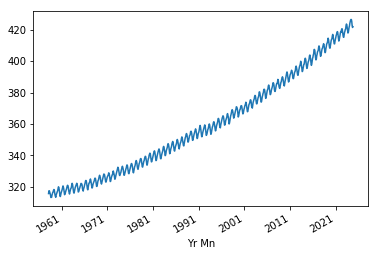

In [57]:
sorted_data['CO2 [ppm]'].plot()

### Zoom in the last year of the CO2 concentration graph

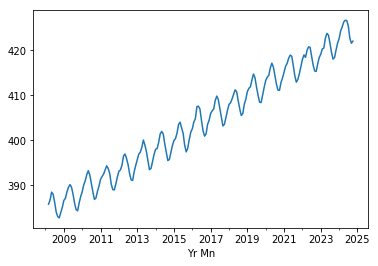

In [58]:
sorted_data['CO2 [ppm]'][-200:].plot()

### Caracterization of oscillation

Strategy : to caraterize the oscillation we decide to substract mean of CO2 concentration of a year, for each year. One year start at march.

In [70]:
first_march = [pd.Timestamp(y, 3, 1) for y in range(1958, sorted_data.index[-1].year + 2)]
year = []
yearly_CO2 = []
print("/!\ Warning : Incomplete year /!\ :")
for week1, week2 in zip(first_march[:-1], first_march[1:]):
    one_year = sorted_data['CO2 [ppm]'][week1:(week2 - pd.DateOffset(days=1))]
    # assert (13 > len(one_year) > 9), (print(len(one_year), week1, week2, "\n", one_year))
    if len(one_year) != 12:
        print('year :', week1.year, '\t number of months of data available :', len(one_year))
    yearly_CO2.append(one_year.mean())
    year.append(pd.Period(week1, freq='12M'))
yearly_CO2 = pd.Series(data=yearly_CO2, index=year)

/!\ Warning : Incomplete year /!\ :
year : 1958 	 number of months of data available : 10
year : 1963 	 number of months of data available : 11
year : 1964 	 number of months of data available : 10
year : 2024 	 number of months of data available : 8


#### Graph of the oscillation

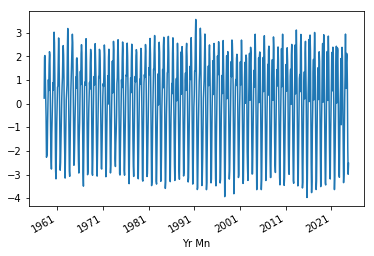

In [71]:
sorted_data['CO2 norm [ppm]'] = sorted_data['CO2 [ppm]']
for period, co2_mean_value in yearly_CO2.items():
    selector = (period.start_time <= sorted_data.index) & (sorted_data.index <= period.end_time)  # boolean mask of row data datetime in the period of yearly_CO2
    sorted_data['CO2 norm [ppm]'].loc[selector] = sorted_data[selector]['CO2 [ppm]'] - co2_mean_value
sorted_data['CO2 norm [ppm]'].plot()

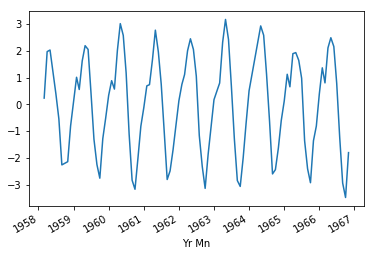

In [72]:
sorted_data['CO2 norm [ppm]'][:100].plot()

#### Zoom of the last 2 years

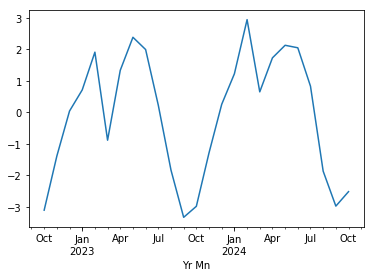

In [73]:
sorted_data['CO2 norm [ppm]'][-25:].plot()

#### Analyse of the oscillation 

In the various figures, we can see a regular oscillation, which corresponds to the Earth's respiration. In fact, we see an increase in CO2 concentration at the beginning of October, which coincides with a decrease in sunlight and the loss of leaves by trees - autumn. Trees capture less CO2 and convert it into O2, leading to an increase in the concentration of CO2 in the air. By mid-spring, trees begin to capture CO2 again, causing a drop in concentration.

The peaks in March correspond to the method used to define the oscillation. In fact, we normalize over a year from March onwards. To limit this effect, it would have been interesting to normalize over a sliding window.

### Systematic evolution

Strategy : We use mean data of each year to remove the oscillation of the data.

#### Graph of the evolution

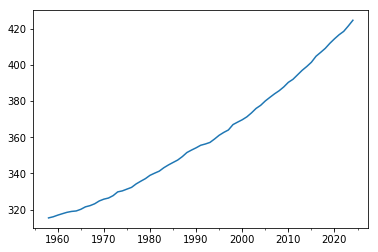

In [74]:
yearly_CO2.to_timestamp().plot()  # Need to convert to timestamp because pd.version is 0.22 and bug(https://github.com/pandas-dev/pandas/issues/14763) has not been patch

#### Estimate function

Estimate function of the ascend with function parameters. Orange line is real data, Blue line is estimated function

f(x) = 0.01x² + 0.72.x + 314.0


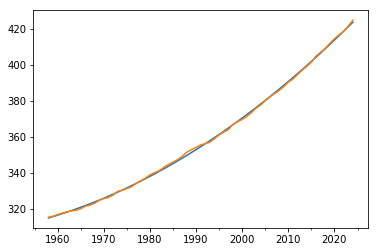

In [168]:
yearly_CO2_df = yearly_CO2.to_frame(name="CO2 mean")
yearly_CO2_df['numeric_index'] = list(range(1, len(yearly_CO2) + 1))
coef = np.polyfit(yearly_CO2_df['numeric_index'].values, yearly_CO2_df['CO2 mean'].values, 2)
yearly_CO2_df['fit'] = np.polyval(coef,yearly_CO2_df['numeric_index'].values)
yearly_CO2_df['fit'].to_timestamp().plot()
yearly_CO2.to_timestamp().plot()

print(f"f(x) = {np.round(coef[0], 2)}x² + {np.round(coef[1], 2)}.x + {np.round(coef[2])}")

### Projection for 2030

Estimation of the CO2 concentration in the green line.

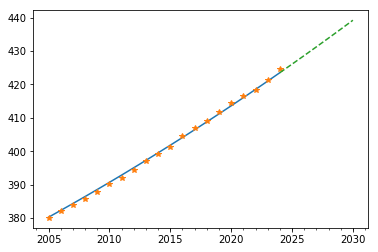

In [165]:
yearly_CO2_df['fit'].to_timestamp()[-20:].plot()
yearly_CO2.to_timestamp()[-20:].plot(style='*')
yearly_CO2_projection = yearly_CO2_df.copy()
most_recent_date = yearly_CO2_projection.index[-1]
last_index = yearly_CO2_projection["numeric_index"][-1]
projection_index = pd.date_range(most_recent_date.start_time, "2030/03/02", freq="AS-MAR").normalize()
numeric_index = range(last_index, last_index + len(projection_index))
fit_value = np.polyval(coef, list(numeric_index))
projection_serie = pd.Series(fit_value, index=projection_index)
projection_serie.plot(style='--')